In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_raw = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [3]:
print(f"This data set has {df_raw.shape[0]} rows and {df_raw.shape[1]} columns")

This data set has 7043 rows and 21 columns


In [4]:
df_raw.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
in_line = 0
for i in df_raw.columns:
    in_line += 1
    if in_line < 10:
        print(i, end=", ")
    else:
        print(i)
        in_line = 0

customerID, gender, SeniorCitizen, Partner, Dependents, tenure, PhoneService, MultipleLines, InternetService, OnlineSecurity
OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod, MonthlyCharges, TotalCharges
Churn, 

In [6]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
for i in range(len(df_raw.columns)):
    print(f"{df_raw.columns[i]}: {df_raw[df_raw.columns[i]].unique()} Unique Values: {df_raw[df_raw.columns[i]].nunique()}")

customerID: ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK'] Unique Values: 7043
gender: ['Female' 'Male'] Unique Values: 2
SeniorCitizen: [0 1] Unique Values: 2
Partner: ['Yes' 'No'] Unique Values: 2
Dependents: ['No' 'Yes'] Unique Values: 2
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39] Unique Values: 73
PhoneService: ['No' 'Yes'] Unique Values: 2
MultipleLines: ['No phone service' 'No' 'Yes'] Unique Values: 3
InternetService: ['DSL' 'Fiber optic' 'No'] Unique Values: 3
OnlineSecurity: ['No' 'Yes' 'No internet service'] Unique Values: 3
OnlineBackup: ['Yes' 'No' 'No internet service'] Unique Values: 3
DeviceProtection: ['No' 'Yes' 'No internet service'] Unique Values: 3
TechSupport: ['No' 'Yes' 'No internet service'] Unique Values: 3
StreamingTV: ['No' 'Yes' 'No inte

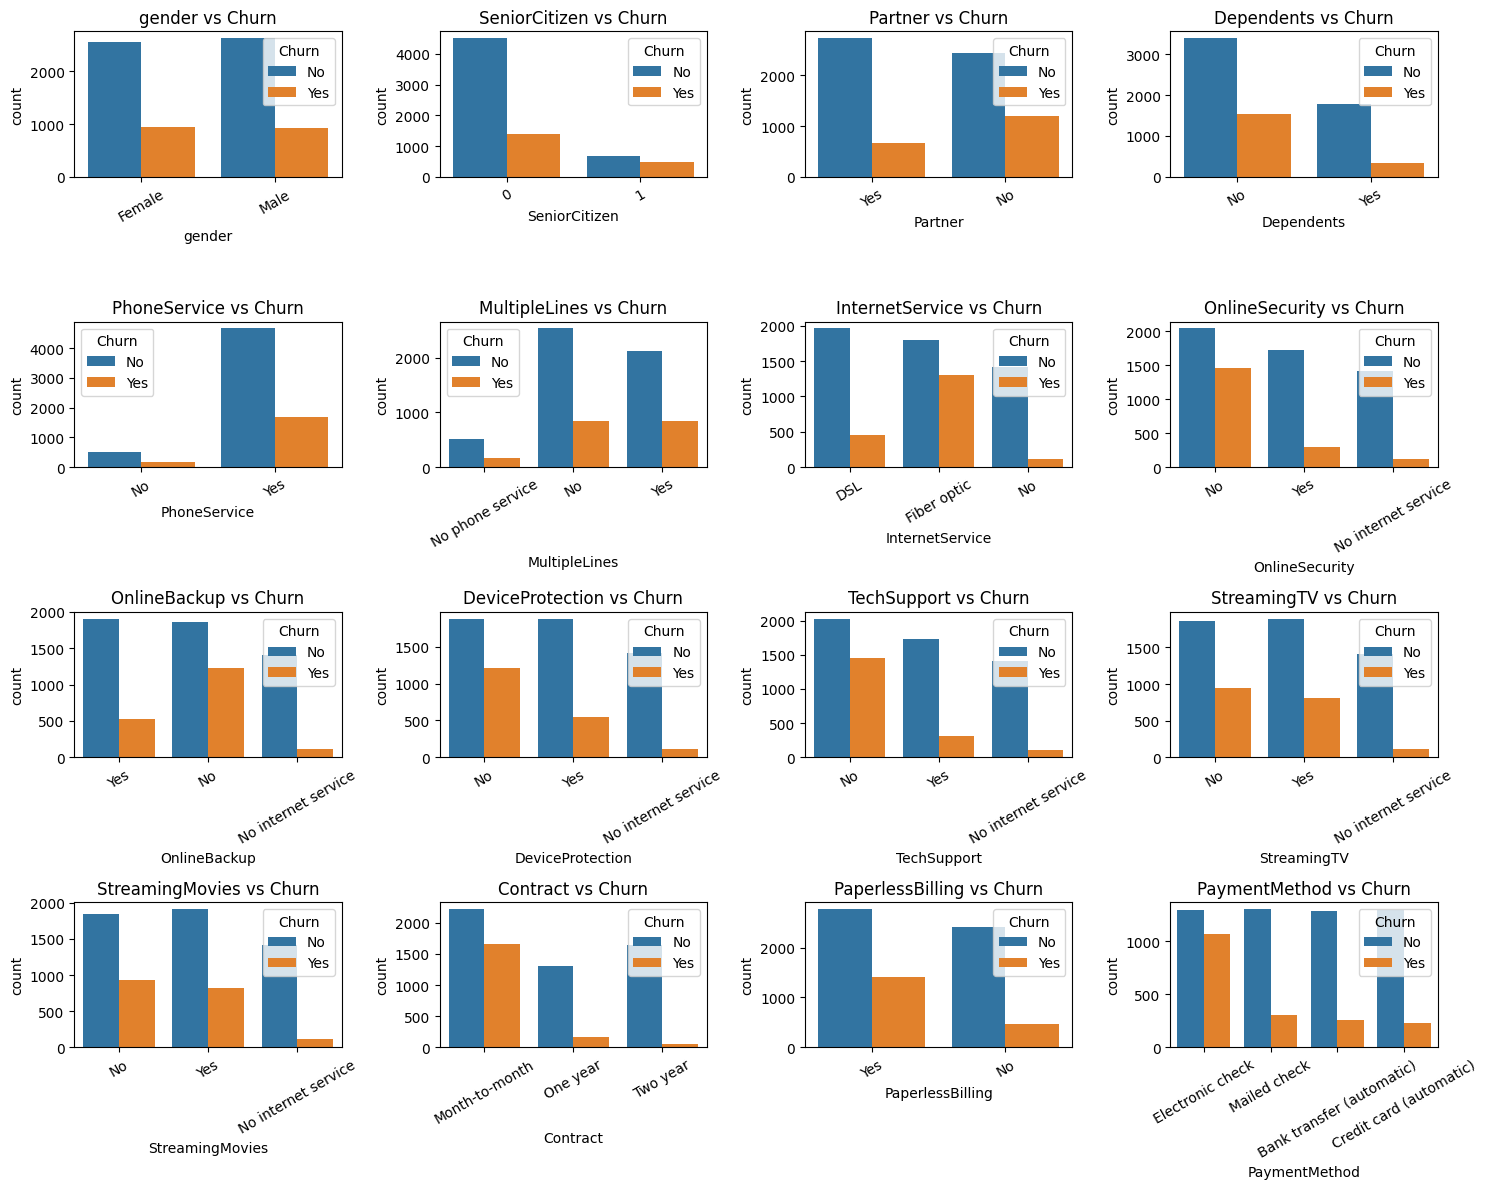

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

categorical_features = ["gender", "SeniorCitizen", "Partner", "Dependents",
                        "PhoneService", "MultipleLines", "InternetService",
                        "OnlineSecurity", "OnlineBackup", "DeviceProtection",
                        "TechSupport", "StreamingTV", "StreamingMovies",
                        "Contract", "PaperlessBilling", "PaymentMethod"]

fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(15, 12))
axes = axes.flatten()

for i, feature in enumerate(categorical_features):
    sns.countplot(x=df_raw[feature], hue=df_raw["Churn"], ax=axes[i])
    axes[i].set_title(f"{feature} vs Churn")
    axes[i].tick_params(axis='x', rotation=30)

plt.tight_layout()
plt.show()


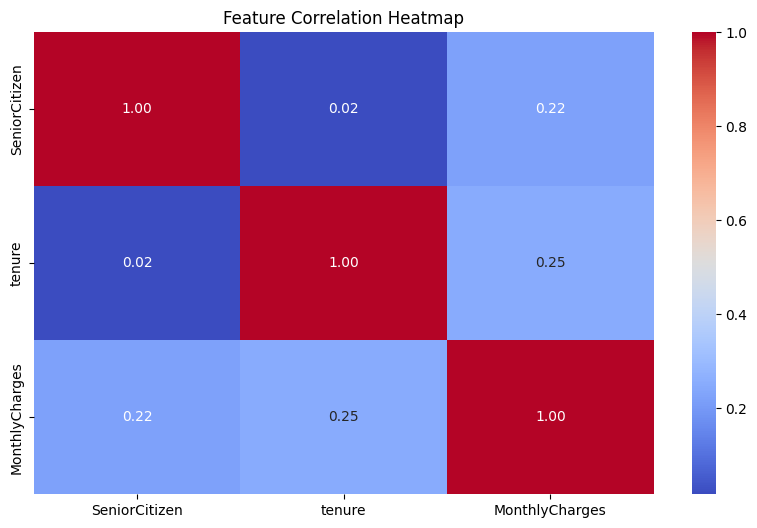

In [9]:
plt.figure(figsize=(10, 6))
sns.heatmap(df_raw.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()


In [10]:
num_columns = df_raw.select_dtypes(include=np.number).columns
cat_columns = df_raw.select_dtypes(exclude=np.number).columns
cat_columns

Index(['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges',
       'Churn'],
      dtype='object')

In [11]:
df_raw[cat_columns].head()

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
0,7590-VHVEG,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,No
1,5575-GNVDE,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,1889.5,No
2,3668-QPYBK,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,108.15,Yes
3,7795-CFOCW,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),1840.75,No
4,9237-HQITU,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,151.65,Yes


In [12]:
df_raw["TotalCharges"] = pd.to_numeric(df_raw["TotalCharges"], errors='coerce')

df_raw["TotalCharges"] = df_raw["TotalCharges"].astype(np.float32)

In [13]:
df_raw['Churn'] = df_raw['Churn'].map({'No': 0, 'Yes': 1})
df_raw.drop(columns=["customerID"], inplace=True)

In [14]:
cat_columns = df_raw.select_dtypes(exclude=np.number).columns
cat_columns

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object')

In [15]:
df_raw[cat_columns].head()

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
0,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check
1,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check
2,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check
3,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic)
4,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check


In [16]:
df_raw = pd.get_dummies(df_raw, columns=cat_columns, drop_first=True)

In [17]:
num_columns = df_raw.select_dtypes(include=np.number).columns
num_columns

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'Churn'], dtype='object')

In [18]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_raw[['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']] = scaler.fit_transform(df_raw[['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']])

In [19]:
df_raw.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,-0.439916,-1.277445,-1.160323,-0.994194,0,False,True,False,False,True,...,False,False,False,False,False,False,True,False,True,False
1,-0.439916,0.066327,-0.259629,-0.173740,0,True,False,False,True,False,...,False,False,False,False,True,False,False,False,False,True
2,-0.439916,-1.236724,-0.362660,-0.959649,1,True,False,False,True,False,...,False,False,False,False,False,False,True,False,False,True
3,-0.439916,0.514251,-0.746535,-0.195248,0,True,False,False,False,True,...,False,False,False,False,True,False,False,False,False,False
4,-0.439916,-1.236724,0.197365,-0.940457,1,False,False,False,True,False,...,False,False,False,False,False,False,True,False,True,False


In [20]:
df_raw.isnull().sum()/df_raw.shape[0] * 100

,0
SeniorCitizen,0.000000
tenure,0.000000
MonthlyCharges,0.000000
TotalCharges,0.156183
Churn,0.000000
gender_Male,0.000000
Partner_Yes,0.000000
Dependents_Yes,0.000000
PhoneService_Yes,0.000000
MultipleLines_No phone service,0.000000


In [21]:
total_charges_median = df_raw['TotalCharges'].median()
df_raw['TotalCharges'] = df_raw['TotalCharges'].fillna(total_charges_median)

In [22]:
df_raw["TotalCharges"].isnull().sum()/df_raw.shape[0] * 100

np.float64(0.0)

## Model Selection: Logistic Regression vs Neural Network

Now that the dataset has been preprocessed, I will proceed with building two models:

1. **Logistic Regression**: A simple but effective baseline model for binary classification.
2. **Neural Network**: A more complex model that may capture deeper patterns in the data.

The goal is to compare the performance of both models and determine which provides the best outcome in predicting customer churn. I will evaluate them using key metrics such as accuracy, precision, recall, and F1-score.

Next, I will implement both models and analyze their results.


In [23]:
df_raw.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,-0.439916,-1.277445,-1.160323,-0.994194,0,False,True,False,False,True,...,False,False,False,False,False,False,True,False,True,False
1,-0.439916,0.066327,-0.259629,-0.173740,0,True,False,False,True,False,...,False,False,False,False,True,False,False,False,False,True
2,-0.439916,-1.236724,-0.362660,-0.959649,1,True,False,False,True,False,...,False,False,False,False,False,False,True,False,False,True
3,-0.439916,0.514251,-0.746535,-0.195248,0,True,False,False,False,True,...,False,False,False,False,True,False,False,False,False,False
4,-0.439916,-1.236724,0.197365,-0.940457,1,False,False,False,True,False,...,False,False,False,False,False,False,True,False,True,False


In [24]:
df_raw.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn
count,7.043000e+03,7.043000e+03,7.043000e+03,7043.000000,7043.000000
mean,-4.842546e-17,-2.421273e-17,-6.406285e-17,-0.000610,0.265370
std,1.000071e+00,1.000071e+00,1.000071e+00,0.999409,0.441561
min,-4.399165e-01,-1.318165e+00,-1.545860e+00,-0.999069,0.000000
25%,-4.399165e-01,-9.516817e-01,-9.725399e-01,-0.829907,0.000000
50%,-4.399165e-01,-1.372744e-01,1.857327e-01,-0.390815,0.000000
75%,-4.399165e-01,9.214551e-01,8.338335e-01,0.663237,1.000000
max,2.273159e+00,1.613701e+00,1.794352e+00,2.824261,1.000000


In [25]:
from sklearn.model_selection import train_test_split

df_processed = df_raw.copy()
df_features = df_processed.drop(columns=["Churn"])
df_target = df_processed["Churn"]

X_train, X_test, y_train, y_test = train_test_split(df_features, df_target, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (5634, 30)
Shape of X_test: (1409, 30)
Shape of y_train: (5634,)
Shape of y_test: (1409,)


## Logistic Regression Model

In [26]:
X_train_cp, X_test_cp, y_train_cp, y_test_cp = X_train.copy(), X_test.copy(), y_train.copy(), y_test.copy()

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

log_model = LogisticRegression(C=0.1, penalty="elasticnet", solver="saga", max_iter=600, class_weight="balanced", l1_ratio=0.5)
log_model.fit(X_train_cp, y_train_cp)

LogisticRegression(C=0.1, class_weight='balanced', l1_ratio=0.5, max_iter=600,
                   penalty='elasticnet', solver='saga')

In [28]:
y_train_pred = log_model.predict(X_train_cp)
y_test_pred = log_model.predict(X_test_cp)

train_accuracy = accuracy_score(y_train_cp, y_train_pred)
train_precision = precision_score(y_train_cp, y_train_pred)
train_recall = recall_score(y_train_cp, y_train_pred)
train_f1 = f1_score(y_train_cp, y_train_pred)

test_accuracy = accuracy_score(y_test_cp, y_test_pred)
test_precision = precision_score(y_test_cp, y_test_pred)
test_recall = recall_score(y_test_cp, y_test_pred)
test_f1 = f1_score(y_test_cp, y_test_pred)

print("Training Set Evaluation:")
print("Accuracy:", train_accuracy)
print("Precision:", train_precision)
print("Recall:", train_recall)
print("F1-score:", train_f1)

print("\nTest Set Evaluation:")
print("Accuracy:", test_accuracy)
print("Precision:", test_precision)
print("Recall:", test_recall)
print("F1-score:", test_f1)

Training Set Evaluation:
Accuracy: 0.7476038338658147
Precision: 0.5159071367153912
Recall: 0.8021390374331551
F1-score: 0.6279434850863422

Test Set Evaluation:
Accuracy: 0.7572746628814763
Precision: 0.5264054514480409
Recall: 0.8284182305630027
F1-score: 0.64375


## Logistic Regression Model Evaluation

The Logistic Regression model was trained and evaluated using key classification metrics: **Accuracy**, **Precision**, **Recall**, and **F1-score**.

### **Training Set Performance**
- **Accuracy**: 74.76%  
- **Precision**: 51.59%  
- **Recall**: 80.21%  
- **F1-score**: 62.79%  

### **Test Set Performance**
- **Accuracy**: 75.73%  
- **Precision**: 52.64%  
- **Recall**: 82.84%  
- **F1-score**: 64.38%  

### **Observations**
- The model maintains **consistent accuracy** across the training and test sets, indicating minimal overfitting.
- **High recall** suggests the model effectively identifies customers likely to churn.
- **Lower precision** means some non-churning customers are misclassified as churners.
- The **F1-score** provides a balanced measure of precision and recall.

Next, I will compare these results with a Neural Network model to determine which performs better.


## Neural Network

In [29]:
X_tr, X_te, y_tr, y_te = X_train.copy(), X_test.copy(), y_train.copy(), y_test.copy()

In [30]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [31]:
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_tr.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [32]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │           1,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,097 (16.00 KB)

 Trainable params: 4,097 (16.00 KB)

 Non-trainable params: 0 (0.00 B)

In [33]:
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.optimizers import Adam

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [34]:
model.fit(X_tr, y_tr, epochs=17, batch_size=32, validation_split=0.2)

Epoch 1/17
141/141 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.7365 - loss: 0.5263 - val_accuracy: 0.7968 - val_loss: 0.4216
Epoch 2/17
141/141 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7962 - loss: 0.4327 - val_accuracy: 0.8066 - val_loss: 0.4125
Epoch 3/17
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7918 - loss: 0.4325 - val_accuracy: 0.8030 - val_loss: 0.4102
Epoch 4/17
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7918 - loss: 0.4297 - val_accuracy: 0.8110 - val_loss: 0.4085
Epoch 5/17
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7971 - loss: 0.4300 - val_accuracy: 0.8119 - val_loss: 0.4107
Epoch 6/17
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8051 - loss: 0.4143 - val_accuracy: 0.8101 - val_loss: 0.4077
Epoch 7/17
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8070 - loss: 0.4123 - val_accuracy: 0.8048 - val_loss: 0.4088
Epoch 8/17
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8142 - loss: 0.4044 - val_accuracy: 0

In [ ]:
y_pred_nn = (model.predict(X_te) > 0.5).astype("int32")

nn_train_accuracy = accuracy_score(y_tr, (model.predict(X_tr) > 0.5).astype("int32"))
nn_train_precision = precision_score(y_tr, (model.predict(X_tr) > 0.5).astype("int32"))
nn_train_recall = recall_score(y_tr, (model.predict(X_tr) > 0.5).astype("int32"))
nn_train_f1 = f1_score(y_tr, (model.predict(X_tr) > 0.5).astype("int32"))

nn_test_accuracy = accuracy_score(y_te, y_pred_nn)
nn_test_precision = precision_score(y_te, y_pred_nn)
nn_test_recall = recall_score(y_te, y_pred_nn)
nn_test_f1 = f1_score(y_te, y_pred_nn)

print("Neural Network Training Set Evaluation:")
print("Accuracy:", nn_train_accuracy)
print("Precision:", nn_train_precision)
print("Recall:", nn_train_recall)
print("F1-score:", nn_train_f1)

print("\nNeural Network Test Set Evaluation:")
print("Accuracy:", nn_test_accuracy)
print("Precision:", nn_test_precision)
print("Recall:", nn_test_recall)
print("F1-score:", nn_test_f1)


45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Neural Network Training Set Evaluation:
Accuracy: 0.8194888178913738
Precision: 0.6680701754385965
Recall: 0.6363636363636364
F1-score: 0.6518315645326943

Neural Network Test Set Evaluation:
Accuracy: 0.8055358410220014
Precision: 0.6371191135734072
Recall: 0.6166219839142091
F1-score: 0.6267029972752044


## Neural Network Model Evaluation

The Neural Network model was trained and evaluated using key classification metrics: **Accuracy**, **Precision**, **Recall**, and **F1-score**.

### **Training Set Performance**
- **Accuracy**: 81.95%  
- **Precision**: 66.80%  
- **Recall**: 63.64%  
- **F1-score**: 65.18%  

### **Test Set Performance**
- **Accuracy**: 80.55%  
- **Precision**: 63.71%  
- **Recall**: 61.66%  
- **F1-score**: 62.67%  

### **Comparison with Logistic Regression**
| Metric      | Logistic Regression (Test) | Neural Network (Test) |
|------------|---------------------------|----------------------|
| **Accuracy** | 75.73% | **80.55%** |
| **Precision** | 52.64% | **63.71%** |
| **Recall** | **82.84%** | 61.66% |
| **F1-score** | 64.38% | **62.67%** |

### **Observations**
- The **Neural Network outperforms Logistic Regression** in **accuracy and precision**, meaning it makes more correct predictions overall and has fewer false positives.
- However, the **Logistic Regression model has a higher recall**, meaning it identifies more actual churned customers correctly.
- The **F1-score is comparable**, indicating a tradeoff between precision and recall.

The results suggest that the **Neural Network is better overall**, but the choice depends on whether **minimizing false negatives (recall) or false positives (precision) is more important**.


In [ ]:
import joblib

joblib.dump(log_model, "logistic_model.pkl")

model.save("neural_network_model.h5")


In [ ]:
import numpy as np

np.save("log_model_coefficients.npy", log_model.coef_)
np.save("log_model_intercept.npy", log_model.intercept_)

model.save_weights("neural_network_.weights.h5")


In [ ]:
y_pred_logistic = log_model.predict(X_test)
y_pred_nn = (model.predict(X_test) > 0.5).astype(int)


45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [ ]:
from sklearn.metrics import classification_report

logistic_report = classification_report(y_test, y_pred_logistic, output_dict=True)
nn_report = classification_report(y_test, y_pred_nn, output_dict=True)

joblib.dump(logistic_report, "logistic_classification_report.pkl")
joblib.dump(nn_report, "nn_classification_report.pkl")


['nn_classification_report.pkl']

In [42]:
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_logistic))

print("Neural Network Classification Report:")
print(classification_report(y_test, y_pred_nn))


Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.73      0.82      1036
           1       0.53      0.83      0.64       373

    accuracy                           0.76      1409
   macro avg       0.72      0.78      0.73      1409
weighted avg       0.82      0.76      0.77      1409

Neural Network Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.87      0.87      1036
           1       0.64      0.62      0.63       373

    accuracy                           0.81      1409
   macro avg       0.75      0.75      0.75      1409
weighted avg       0.80      0.81      0.80      1409



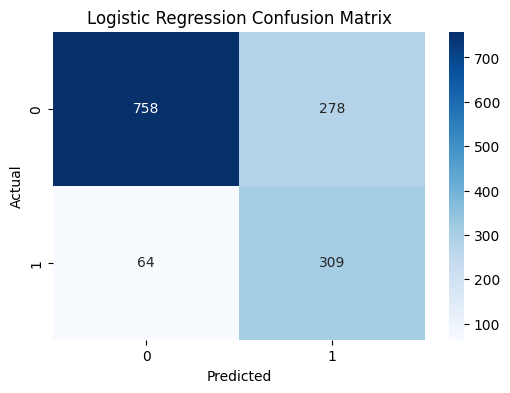

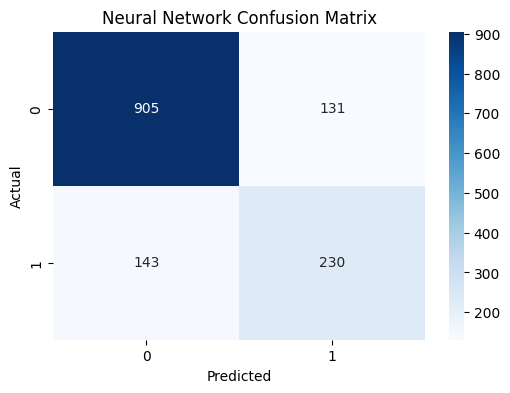

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(title)
    plt.show()

plot_confusion_matrix(y_test, y_pred_logistic, "Logistic Regression Confusion Matrix")
plot_confusion_matrix(y_test, y_pred_nn, "Neural Network Confusion Matrix")
